In [1]:
from torchvision import models
import torch
import GAE

In [2]:
model = models.alexnet(pretrained=True)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [4]:
from PIL import Image
img = Image.open("images/mastiff.jpg")
img2 = Image.open("images/dog.jpg")

In [5]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [6]:
with open('imagenet_classes') as f:
    classes = [line.strip() for line in f.readlines()]

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = inv_normalize(img)
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

def imshow_compare(img1, img2):
    #innormalize
    pert = img2.cpu()-img1.cpu()
    img1 = inv_normalize(img1.cpu())
    img2 = inv_normalize(img2.cpu())
    pert = inv_normalize(pert)
    
    #to_numpy
    npimg1 = img1.detach().numpy()
    npimg2 = img2.detach().numpy()
    nppert = pert.detach().numpy()
    
    f, axarr = plt.subplots(1, 3)
    axarr[0].imshow(np.transpose(npimg1, (1, 2, 0)))
    axarr[1].imshow(np.transpose(nppert, (1, 2, 0)))
    axarr[2].imshow(np.transpose(npimg2, (1, 2, 0)))

    plt.show()

In [8]:
original_output, perturbed_output, perturbed_image = GAE.fgsm(model, batch_t, 0.1, torch.device('cuda'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


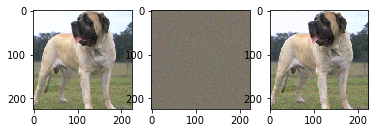

[('243, bull_mastiff', 99.16261291503906), ('246, Great_Dane', 0.6843625903129578), ('254, pug', 0.08243435621261597), ('255, Leonberg', 0.021067289635539055), ('225, malinois', 0.020857185125350952)]


[('348, ram', 10.059934616088867),
 ('9, ostrich', 3.739450454711914),
 ('364, three-toed_sloth', 3.4630696773529053),
 ('228, komondor', 3.16961932182312),
 ('345, ox', 2.9709389209747314)]

In [9]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [16]:
original_output, perturbed_output, perturbed_image = GAE.fgsm_targeted(model, batch_t, 0.1, torch.tensor([879]), torch.device('cuda'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


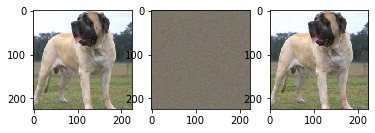

[('243, bull_mastiff', 99.16261291503906), ('246, Great_Dane', 0.6843625903129578), ('254, pug', 0.08243435621261597), ('255, Leonberg', 0.021067289635539055), ('225, malinois', 0.020857185125350952)]


[('243, bull_mastiff', 97.1231918334961),
 ('254, pug', 2.17655086517334),
 ('247, Saint_Bernard', 0.40562599897384644),
 ('255, Leonberg', 0.16071876883506775),
 ('246, Great_Dane', 0.034822504967451096)]

In [17]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [18]:
original_output, perturbed_output, perturbed_image = GAE.basic_iterative( model, batch_t, alpha=0.1, epsilon=10, num_iter=None, device=torch.device('cuda'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


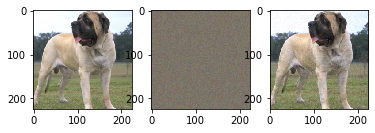

[('243, bull_mastiff', 99.16261291503906), ('246, Great_Dane', 0.6843625903129578), ('254, pug', 0.08243435621261597), ('255, Leonberg', 0.021067289635539055), ('225, malinois', 0.020857185125350952)]


[('328, sea_urchin', 40.396270751953125),
 ('322, ringlet', 15.76705265045166),
 ('326, lycaenid', 15.234107971191406),
 ('947, mushroom', 6.551670074462891),
 ('397, puffer', 4.220912933349609)]

In [19]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [20]:
original_output, perturbed_output, perturbed_image = GAE.iterative_ll_class( model, batch_t, alpha=0.1, epsilon=10, num_iter=None, device=torch.device('cuda'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


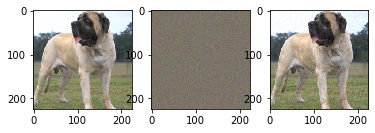

[('243, bull_mastiff', 99.16261291503906), ('246, Great_Dane', 0.6843625903129578), ('254, pug', 0.08243435621261597), ('255, Leonberg', 0.021067289635539055), ('225, malinois', 0.020857185125350952)]


[('20, water_ouzel', 100.0),
 ('137, American_coot', 3.179508667017217e-06),
 ('13, junco', 2.418934627712588e-06),
 ('136, European_gallinule', 1.613598837879593e-11),
 ('17, jay', 1.636959122940096e-12)]

In [21]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [22]:
original_output, perturbed_output, perturbed_image = GAE.deep_fool(model, batch_t, 10, torch.device('cuda'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


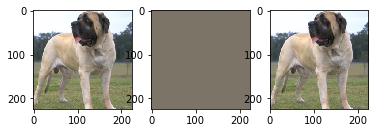

[('243, bull_mastiff', 99.16261291503906), ('246, Great_Dane', 0.6843625903129578), ('254, pug', 0.08243435621261597), ('255, Leonberg', 0.021067289635539055), ('225, malinois', 0.020857185125350952)]


[('255, Leonberg', 48.46829605102539),
 ('243, bull_mastiff', 48.46829605102539),
 ('225, malinois', 1.2607148885726929),
 ('246, Great_Dane', 0.6965330839157104),
 ('235, German_shepherd', 0.41746240854263306)]

In [23]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [8]:
original_output, perturbed_output, perturbed_image = GAE.lbfgs(model, batch_t, torch.tensor([255]), 0.01, 5, 5, 2, torch.device('cpu'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


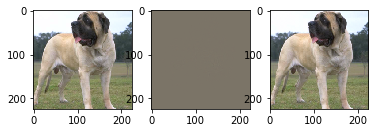

[('243, bull_mastiff', 99.16262817382812), ('246, Great_Dane', 0.6843653321266174), ('254, pug', 0.08243437111377716), ('255, Leonberg', 0.021067453548312187), ('225, malinois', 0.02085726708173752)]


[('255, Leonberg', 55.50081253051758),
 ('243, bull_mastiff', 41.803932189941406),
 ('225, malinois', 1.233535885810852),
 ('246, Great_Dane', 0.4729282557964325),
 ('235, German_shepherd', 0.34846609830856323)]

In [9]:
imshow_compare(batch_t[0], perturbed_image[0])
#original output
or_percentage = torch.nn.functional.softmax(original_output, dim=1)[0] * 100
_, or_indices = torch.sort(original_output, descending=True)
print([(classes[idx], or_percentage[idx].item()) for idx in or_indices[0][:5]])

#perturbed_output
per_percentage = torch.nn.functional.softmax(perturbed_output, dim=1)[0] * 100
_, per_indices = torch.sort(perturbed_output, descending=True)
[(classes[idx], per_percentage[idx].item()) for idx in per_indices[0][:5]]


In [2]:
a = [('class1',98.112),('class2',98.112),('class3',98.112),('class4',98.112)]

In [3]:
dict(a)

{'class1': 98.112, 'class2': 98.112, 'class3': 98.112, 'class4': 98.112}

In [21]:
dict(b)

ValueError: dictionary update sequence element #0 has length 3; 2 is required